In [6]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Create an instance of a graph
G = nx.Graph()

# Create an edge between two nodes
G.add_edge('A', 'B', weight=6)

In [27]:
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network()
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show('nx.html', notebook=False)

nx.html


In [ ]:
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("../../notebooks/NetworkOfThrones.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

got_net.show("gameofthrones.html")

In [29]:
data = pd.read_csv("facebook_combined.txt", sep=" ", header=None)
data.columns = ["person1", "person2"]

In [30]:
sample = data.sample(1000, random_state=1)
sample.head(10)

,person1,person2
74346,2839,3064
62630,2309,2590
199,0,200
51398,2088,2468
27375,1319,1568
37813,1741,1809
83696,3460,3761
17028,1029,1613
82498,3332,3355
2472,107,1699


In [33]:
net = Network(
    notebook=True,
    cdn_resources="remote",
    bgcolor="#222222",
    font_color="white",
    height="750px",
    width="100%",
)
nodes = list(set([*sample.person1, *sample.person2]))
edges = sample.values.tolist()
net.add_nodes(nodes)
net.add_edges(edges)
net.show('nx2.html', notebook=False)

nx2.html


In [42]:
G = nx.Graph()
for i in range(30):
    node_1 = np.random.randint(10)
    node_2 = np.random.randint(10)
    if node_1 != node_2:
        G.add_edge(node_1, node_2)    
    


undir.html


In [49]:
nt = Network()
# populates the nodes and edges data structures
nt.from_nx(G)
for node in nt.nodes:
    node['color'] = '#FFAC33'
nt.show('undir.html', notebook=False)

undir.html


In [46]:
Gd = nx.DiGraph()
for i in range(30):
    node_1 = np.random.randint(10)
    node_2 = np.random.randint(10)
    if node_1 != node_2:
        Gd.add_edge(node_1, node_2)    
    

In [50]:
nt = Network(directed =True)
# populates the nodes and edges data structures
nt.from_nx(Gd)
for node in nt.nodes:
    node['color'] = '#CCFF00'
nt.show('dir.html', notebook=False)

dir.html


In [38]:
#weighted graph
G = nx.Graph()

G.add_edge("A", "B", weight=0.6)
G.add_edge("A", "C", weight=0.2)
G.add_edge("C", "D", weight=0.1)
G.add_edge("C", "E", weight=0.7)
G.add_edge("C", "F", weight=0.9)
G.add_edge("A", "D", weight=0.3)

In [39]:
nt = Network(directed =True)
# populates the nodes and edges data structures
nt.from_nx(G)
nt.nodes

[{'color': '#97c2fc', 'size': 10, 'id': 'A', 'label': 'A', 'shape': 'dot'},
 {'color': '#97c2fc', 'size': 10, 'id': 'B', 'label': 'B', 'shape': 'dot'},
 {'color': '#97c2fc', 'size': 10, 'id': 'C', 'label': 'C', 'shape': 'dot'},
 {'color': '#97c2fc', 'size': 10, 'id': 'D', 'label': 'D', 'shape': 'dot'},
 {'color': '#97c2fc', 'size': 10, 'id': 'E', 'label': 'E', 'shape': 'dot'},
 {'color': '#97c2fc', 'size': 10, 'id': 'F', 'label': 'F', 'shape': 'dot'}]

In [31]:
nt = Network(directed =True)
# populates the nodes and edges data structures
nt.from_nx(G)
# for node in nt.nodes:
    # node['color'] = '#FFAC33'

for edge in nt.edges:
    edge['width'] = 7*G[edge['from']][edge['to']]['width']
nt.show('test.html', notebook=False)

test.html


In [16]:
nt.edges

[{'width': 1, 'from': 'A', 'to': 'B', 'arrows': 'to'},
 {'width': 1, 'from': 'A', 'to': 'C', 'arrows': 'to'},
 {'width': 1, 'from': 'A', 'to': 'D', 'arrows': 'to'},
 {'width': 1, 'from': 'C', 'to': 'D', 'arrows': 'to'},
 {'width': 1, 'from': 'C', 'to': 'E', 'arrows': 'to'},
 {'width': 1, 'from': 'C', 'to': 'F', 'arrows': 'to'}]

In [19]:
G['A']

AtlasView({'B': {'weight': 0.6}, 'C': {'weight': 0.2}, 'D': {'weight': 0.3}})

In [45]:
# PAgerank
G = nx.barabasi_albert_graph(25,4, seed=42)

nt = Network()
nt.from_nx(G)
i=0
for node in nt.nodes:
    node['label'] = str(i)
    i+=1
nt.show('test.html', notebook=False)

test.html


In [44]:
G = nx.barabasi_albert_graph(25,4, seed=42)
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}})

In [15]:
G = nx.barabasi_albert_graph(25,4, seed=42)
pagerank_results = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)
pagerank_results = pd.Series(pagerank_results).sort_values(ascending=False)


In [23]:
data = pagerank_results.iloc[:10]
data

0     0.082874
7     0.072692
6     0.072244
5     0.067810
9     0.058774
8     0.051333
3     0.050524
16    0.036847
12    0.036644
18    0.036205
dtype: float64

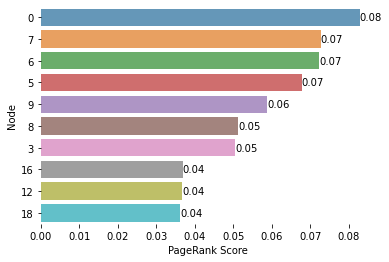

In [27]:
fig, ax = plt.subplots()
sns.barplot(x=pagerank_results.iloc[:10].values, y=pagerank_results.iloc[:10].index.astype(str), orient='h', alpha=0.75)
ax.set_xlabel('PageRank Score')
ax.set_ylabel('Node')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')
plt.savefig('page-rank.png')

In [19]:
data

0     0.082874
7     0.072692
6     0.072244
5     0.067810
9     0.058774
8     0.051333
3     0.050524
16    0.036847
12    0.036644
18    0.036205
dtype: float64

In [85]:
G = nx.barabasi_albert_graph(25,4, seed=42)
G_dir = G.to_directed()
hits_results = nx.hits(G, max_iter=100, tol=1e-06)
authority_results = pd.Series(hits_results[0])#.sort_values(ascending=False)
hubs_results = pd.Series(hits_results[1])#.sort_values(ascending=False)

In [86]:
for a, b in list(G.edges()):
    G_dir.remove_edge(a, b)

In [87]:
hits_results = nx.hits(G_dir, max_iter=100, tol=1e-06)
authority_results = pd.Series(hits_results[1]).sort_values(ascending=False)
hubs_results = pd.Series(hits_results[0]).sort_values(ascending=False)

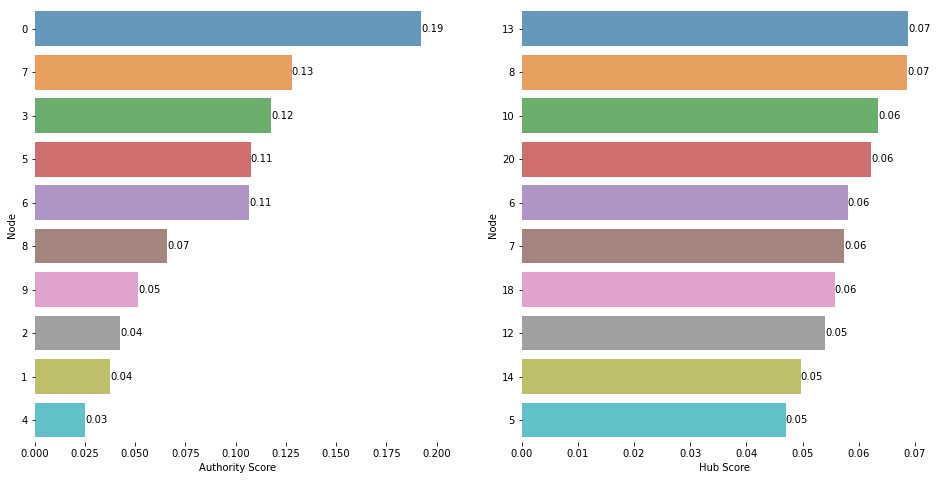

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
sns.barplot(x=authority_results.iloc[:10].values, y=authority_results.iloc[:10].index.astype(str), orient='h', alpha=0.75, ax=ax1)
ax1.set_xlabel('Authority Score')
ax1.set_ylabel('Node')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
for i in ax1.containers:
    ax1.bar_label(i,fmt='%.2f')


sns.barplot(x=hubs_results.iloc[:10].values, y=hubs_results.iloc[:10].index.astype(str), orient='h', alpha=0.75, ax=ax2)
ax2.set_xlabel('Hub Score')
ax2.set_ylabel('Node')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
for i in ax2.containers:
    ax2.bar_label(i,fmt='%.2f')

plt.savefig('hits.png')